Training Data:
[[ 0.  0.  3. ... 13.  4.  0.]
 [ 0.  0.  9. ...  3.  0.  0.]
 [ 0.  0.  0. ...  6.  0.  0.]
 ...
 [ 0.  0.  9. ... 16.  2.  0.]
 [ 0.  0.  1. ...  0.  0.  0.]
 [ 0.  0.  1. ...  1.  0.  0.]]

Testing Data:
[[ 0.  0.  0. ... 14.  5.  0.]
 [ 0.  0. 11. ...  1.  0.  0.]
 [ 0.  0.  8. ...  8.  0.  0.]
 ...
 [ 0.  0.  7. ... 10.  0.  0.]
 [ 0.  0.  7. ... 16.  4.  0.]
 [ 0.  0. 14. ...  5.  0.  0.]]

SVM Model Accuracy: 0.975
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.94      0.97      0.96        34
           4       1.00      1.00      1.00        46
           5       0.96      0.96      0.96        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       1.00      0.93      0.97  

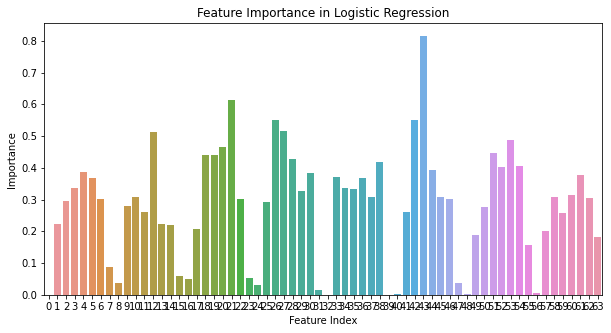

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
data = load_digits()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Training Data:")
print(X_train)
print("\nTesting Data:")
print(X_test)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm_model = SVC(kernel='linear', max_iter=500, probability=True)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("\nSVM Model Accuracy:", svm_accuracy)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
logistic_model = LogisticRegression(max_iter=500)
logistic_model.fit(X_train_scaled, y_train)
y_pred_logistic = logistic_model.predict(X_test_scaled)
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
print("\nLogistic Regression Model Accuracy:", logistic_accuracy)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logistic))
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logistic))
print("\nLearned Model Weights:")
print(logistic_model.coef_)
print("\nComparison of Models:")
print(f"SVM Accuracy: {svm_accuracy}, Logistic Regression Accuracy: {logistic_accuracy}")
feature_importance = np.abs(logistic_model.coef_).mean(axis=0)
plt.figure(figsize=(10, 5))
sns.barplot(x=np.arange(len(feature_importance)), y=feature_importance)
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.title("Feature Importance in Logistic Regression")
plt.show()


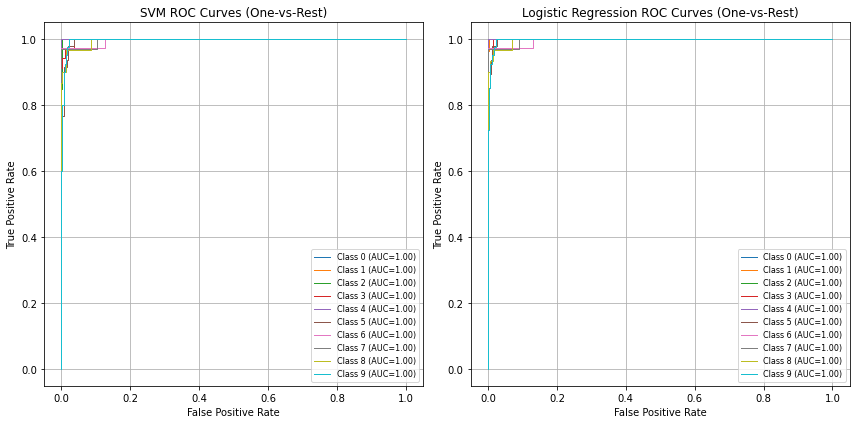

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
y_test_bin = label_binarize(y_test, classes=np.arange(10))
n_classes = y_test_bin.shape[1]
svm_ovr = OneVsRestClassifier(
    SVC(kernel="linear", probability=True, max_iter=2000)
)

y_score_svm = svm_ovr.fit(
    X_train_scaled, y_train
).predict_proba(X_test_scaled)

fpr_svm = {}
tpr_svm = {}
roc_auc_svm = {}

for i in range(n_classes):
    fpr_svm[i], tpr_svm[i], _ = roc_curve(
        y_test_bin[:, i], y_score_svm[:, i]
    )
    roc_auc_svm[i] = auc(fpr_svm[i], tpr_svm[i])
log_ovr = OneVsRestClassifier(
    LogisticRegression(max_iter=2000, n_jobs=-1)
)

y_score_log = log_ovr.fit(
    X_train_scaled, y_train
).predict_proba(X_test_scaled)

fpr_log = {}
tpr_log = {}
roc_auc_log = {}

for i in range(n_classes):
    fpr_log[i], tpr_log[i], _ = roc_curve(
        y_test_bin[:, i], y_score_log[:, i]
    )
    roc_auc_log[i] = auc(fpr_log[i], tpr_log[i])
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for i in range(n_classes):
    plt.plot(
        fpr_svm[i],
        tpr_svm[i],
        lw=1,
        label=f"Class {i} (AUC={roc_auc_svm[i]:.2f})"
    )
plt.title("SVM ROC Curves (One-vs-Rest)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(fontsize=8)
plt.grid(True)
plt.subplot(1, 2, 2)
for i in range(n_classes):
    plt.plot(
        fpr_log[i],
        tpr_log[i],
        lw=1,
        label=f"Class {i} (AUC={roc_auc_log[i]:.2f})"
    )
plt.title("Logistic Regression ROC Curves (One-vs-Rest)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(fontsize=8)
plt.grid(True)

plt.tight_layout()
plt.show()
